# MTpy Example 03

Now that we have an `MTCollection` stored in an `MTH5` we can now plot interesting things.  All the plotting functions can be called directly from the `MTCollection` object. First, let's plot station coverage.  

In [1]:
from pathlib import Path
from mtpy import MTCollection
%matplotlib inline

### Open MTCollection

In the previous example we created a MTH5 file from existing Yellowstone data.  Let's open that file here for plotting.

In [2]:
mc = MTCollection()
mc.open_collection(Path().cwd().parent.parent.joinpath("data", "transfer_functions", "yellowstone_mt_collection_02.h5"))

## Plot Stations

First lets plot the station coverage on a map.  MTpy uses `contextily` if installed to get a USGS Topo map to plot the stations on to.  If you want a different map, maybe imagery, just change the `cx_source` to what you would like.  See [Contextily Documentation](https://contextily.readthedocs.io/en/latest/intro_guide.html) for more details.   

For geospatial plotting a method called `MTCollection.to_geo_df` is provided to produce a `Geopandas.DataFrame` object that can be used for plotting station locations.  You can specify the datum if you like using the EPSG code. This is called internally in `plot_stations`, but good to know its there.

For now lets plot all the stations so we have an idea of the full spatial coverage.

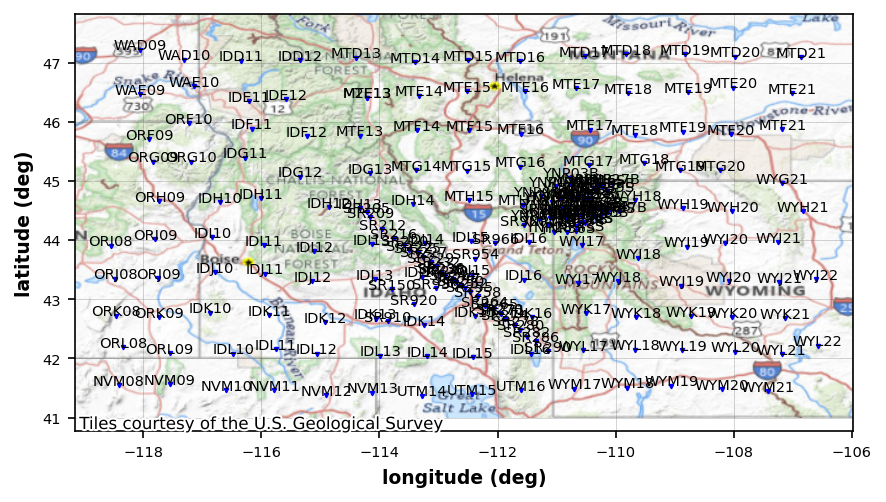

In [3]:
station_plot = mc.plot_stations(map_epsg=4326, bounding_box=None)

### Plot Parameters

At first pass the plot is a little messy, lets update some parameters go make it look nicer.

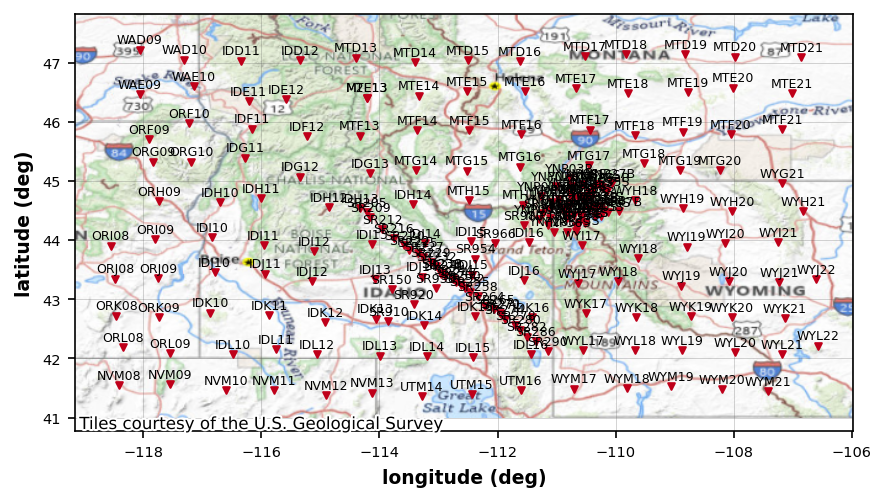

In [4]:
# marker parameters
station_plot.marker_size = 10
station_plot.marker_color = (.75, 0, .1)

# station font size
station_plot.text_size = 6
station_plot.text_y_pad = .1

# redraw
station_plot.redraw_plot()

### Select an area using bounding box

The dense are of stations near Yellowstone is our local target.  Lets select a bounding box on initialization of `plot_stations`.

The bounding box needs to be (min(longitude), max(longitude), min(latitude), max(latitude))

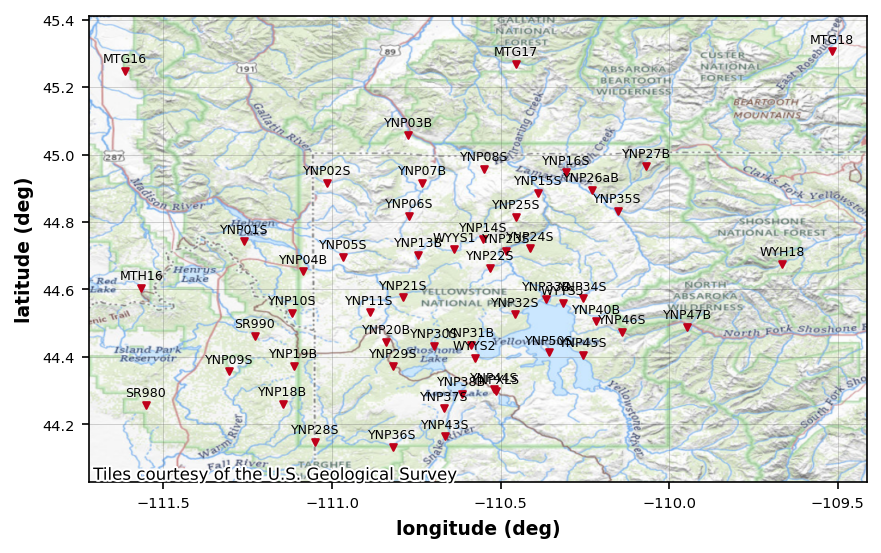

In [5]:
plot_yellowstone_stations = mc.plot_stations(bounding_box=[-112, -109.5, 44, 45.75], marker_size=10, marker_color=(.75, 0, .1), text_size=6, text_y_pad=.025, fig_num=2)

### Select Stations using Working Dataframe

Another way to select stations would be to set the `working_dataframe` to only the "YNP" stations.

In [6]:
mc.working_dataframe = mc.master_dataframe[mc.master_dataframe.station.str.contains("YNP")]

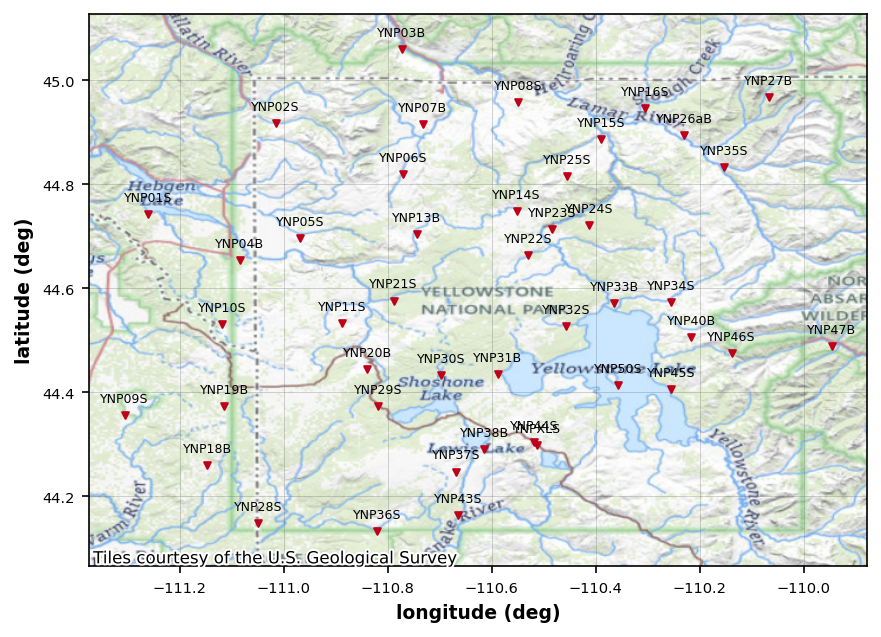

In [7]:
plot_ynp_stations = mc.plot_stations(marker_size=10, marker_color=(.75, 0, .1), text_size=6, text_y_pad=.025, fig_num=3) 

### Change the Background Map

Maybe you don't want to look at the topo, but want to look at the imagery.  You can set the `cx_source` to something that will show imagery, though sometimes the imagery isn't great, at least from the USGS.  Other providers may have better options

In [8]:
import contextily as cx

#### USGS Imagery and Topo

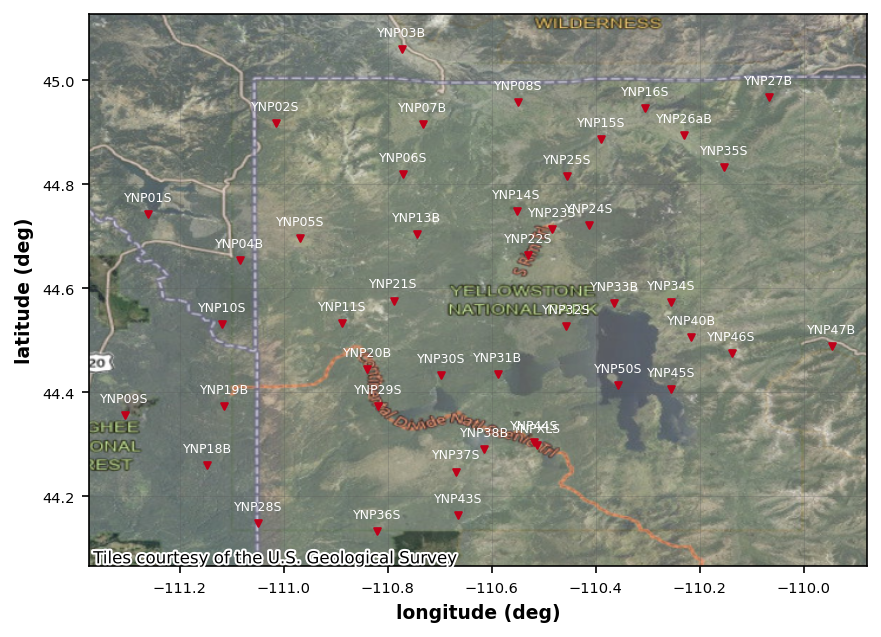

In [9]:
plot_ynp_stations.cx_source = cx.providers.USGS.USImageryTopo
plot_ynp_stations.fig_num = 4
plot_ynp_stations.text_color = (1, 1, 1)
plot_ynp_stations.redraw_plot()

#### Terrain

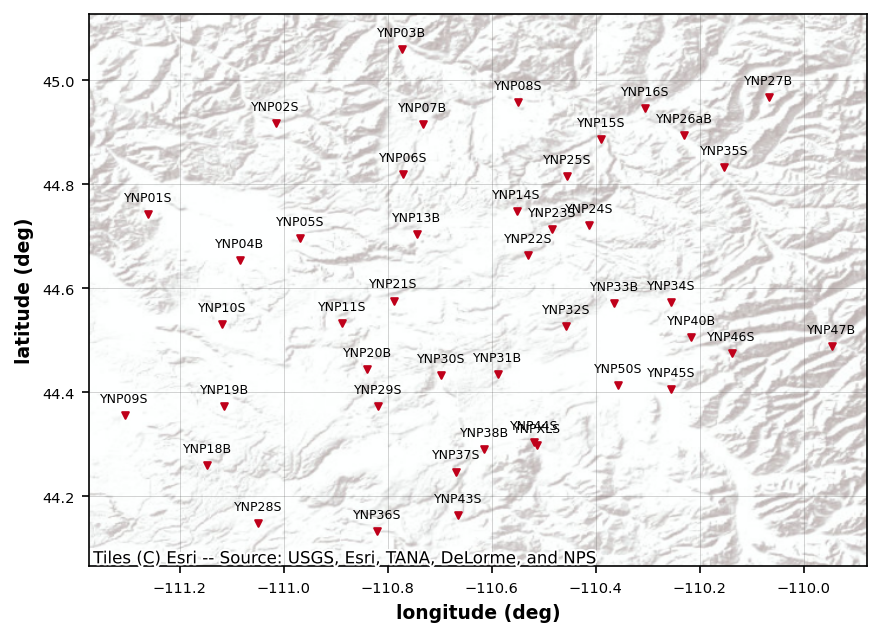

In [13]:
plot_ynp_stations.cx_source = cx.providers.Esri.WorldTerrain
plot_ynp_stations.fig_num = 5
plot_ynp_stations.text_color = (0, 0, 0)
plot_ynp_stations.redraw_plot()

#### Basic Map

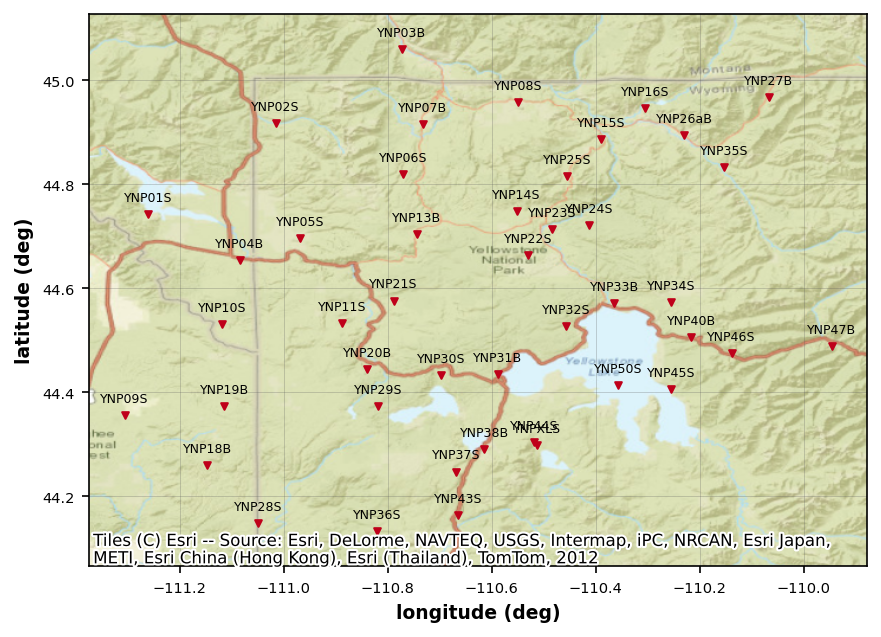

In [14]:
plot_ynp_stations.cx_source = cx.providers.Esri.WorldStreetMap
plot_ynp_stations.fig_num = 6
plot_ynp_stations.redraw_plot()

#### Imagery

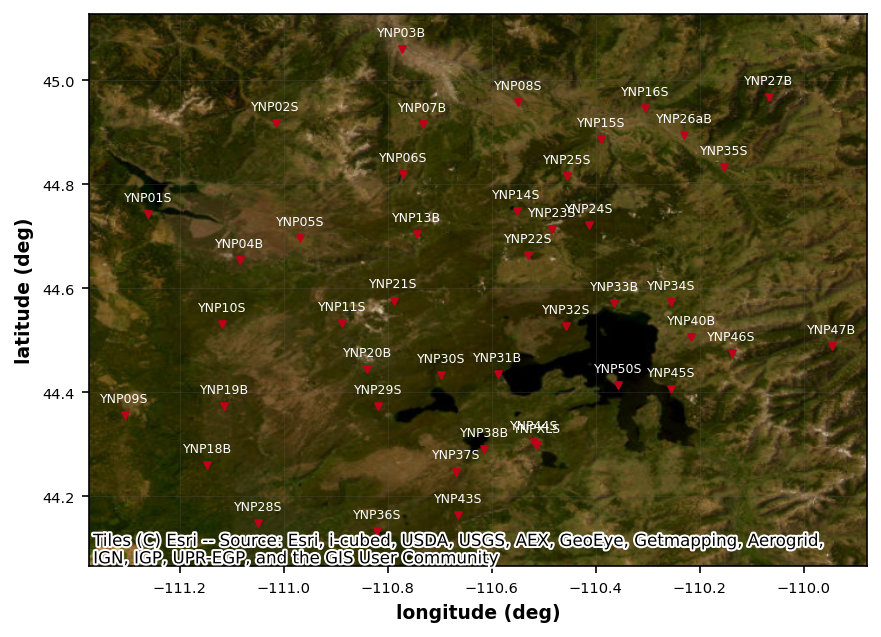

In [16]:
plot_ynp_stations.cx_source = cx.providers.Esri.WorldImagery
plot_ynp_stations.fig_num = 7
plot_ynp_stations.text_color = (1, 1, 1)
plot_ynp_stations.redraw_plot()

## Close Collection

Remember it is important to close the collection when we are done so there are no open instances of the H5 file.

In [17]:
mc.close_collection()

24:09:26T12:31:00 | INFO | line:777 |mth5.mth5 | close_mth5 | Flushing and closing c:\Users\jpeacock\OneDrive - DOI\Documents\GitHub\iris-mt-course-2022\data\transfer_functions\yellowstone_mt_collection_02.h5
